In [154]:
%matplotlib inline

In [155]:
if True: 
    import matplotlib.pylab as plt
    import numpy as np
    


In [176]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

In [177]:
facies, nx,ny = openfile("ti.gslib")

facies


In [178]:
test_real00000 ,  nx, ny = openfile("test_real00000.gslib")

facies_real00000


In [179]:
nx=  50
ny = 50

facies = facies[:nx, :ny]
test_real00000 = test_real00000[:nx, :ny]

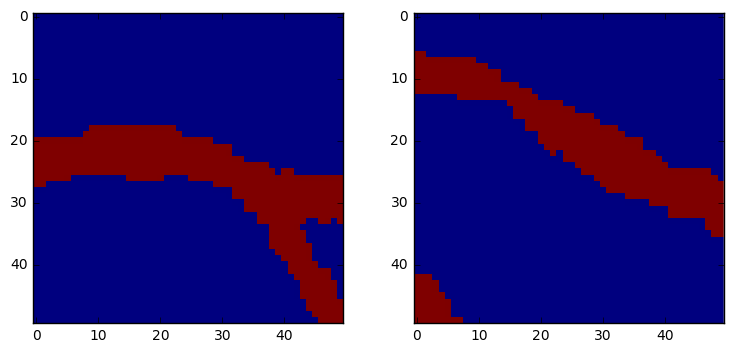

In [180]:
fig = plt.figure(figsize = (9,4))
ax = fig.add_subplot(121)
plt.imshow(facies, interpolation='none')
ax = fig.add_subplot(122)
plt.imshow(test_real00000, interpolation='none')

In [181]:
import pysal
import numpy as np
np.random.seed(12345)
import time

from pysal.esda.getisord import G

In [182]:
x,y=np.indices((nx,ny))
x.shape=(nx**2,1)
y.shape=(ny**2,1)
data=np.hstack([x,y])

# wg = pysal.Kernel(data, fixed = False, function = 'gaussian')
# wknn = pysal.knnW(data, k =4)

start_time = time.time()
wthresh = pysal.threshold_binaryW_from_array(data, 1)
print time.time() - start_time


0.0263559818268


In [196]:
start_time = time.time()
g = G(facies, wthresh)
print "Time elapsed {0:.2f}s".format(time.time() - start_time)
print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)

Gi = g.G

Time elapsed 0.16s
Getis and Ord’s G : 0.0075, (z_sim=61.4643, p_z_sim=0.0010) 


In [197]:
import os
path = '.'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and \
         'test_real' in i]

In [198]:
testfiles = []
for testfile in files:
    test,  _, _ = openfile(testfile)
    testfiles.append(test[:nx, :ny])

facies_real00000 facies_real00001 facies_real00002 facies_real00003 facies_real00004


In [207]:

start_time = time.time()
gs = []
for testfile in testfiles:   
    g = G(testfile[:nx, :ny], wthresh)
    print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
                g.z_sim, g.p_sim)
    gs.append(g.G)
print "Time elapsed {0:.2f}s".format(time.time() - start_time)

Getis and Ord’s G : 0.0083, (z_sim=63.6477, p_z_sim=0.0010) 
Getis and Ord’s G : 0.0048, (z_sim=63.0048, p_z_sim=0.0010) 
Getis and Ord’s G : 0.0076, (z_sim=63.2750, p_z_sim=0.0010) 
Getis and Ord’s G : 0.0060, (z_sim=59.6661, p_z_sim=0.0010) 
Getis and Ord’s G : 0.0050, (z_sim=60.5073, p_z_sim=0.0010) 
Time elapsed 0.84s


In [205]:
gs.append(Gi)

(array([ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0.00481709,  0.00516262,  0.00550814,  0.00585367,  0.00619919,
         0.00654472,  0.00689024,  0.00723577,  0.0075813 ,  0.00792682,
         0.00827235]),
 <a list of 10 Patch objects>)

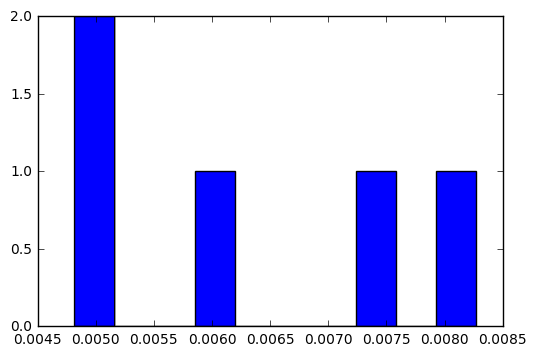

In [208]:
plt.hist(gs)